---
<a name='title'></a>
# **<font color="#8978da"> Modelación Climática Tropical </font>**
### **<font color="#9dudea"> Sesgo entre SPEAR y MSWEP </font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature 
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns
import glob

In [6]:
def mapa_MC(data, levels, ccmap, titulo, extend='max', cbarlabel='Precipitación [mm día$^{-1}$]', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    # Definimos la extensión del mapa
    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo, fontsize=18)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.026, pad=0.06)
    cbar.ax.xaxis.label.set_size(16)  
    cbar.ax.tick_params(labelsize=16)  
    cbar.ax.set_xlabel(cbarlabel)

In [7]:
# Generar automaticamente la lista de archivos 
file_list = np.sort(glob.glob("/home/jovyan/ModClim/SPEAR/monthly*ens*.nc"))
print(file_list)

['/home/jovyan/ModClim/SPEAR/monthly_ens001.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens002.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens003.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens004.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens005.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens006.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens007.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens008.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens009.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens010.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens011.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens012.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens013.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens014.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens015.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens016.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens017.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens018.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens019.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens020.nc'
 '/home/jovyan/ModClim/SPEAR/monthly_ens

In [8]:
ens_dlist = []

for i, filename in enumerate(file_list):
    ds = xr.open_dataset(filename)
    pr = ds['precip'] * 86400  # Convertir a mm/dia
    pr['units'] = 'mm day-1'

    # Selección de meses y periodo
    pr_jjas = pr.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)
    pr_climatology = pr_jjas.sel(time=slice('1980', '2010')).mean('time')

    pr_climatology = pr_climatology.assign_coords(ens=i + 1) 
    ens_dlist.append(pr_climatology)
    
ens_combined = xr.concat(ens_dlist, dim='ens')

ens_mean = ens_combined.mean(dim='ens')

In [9]:
# Guardar los datos 
#ens_mean.to_netcdf('SPEAR_ens80_ClimJJAS.nc')
#ens_mean.to_netcdf('SPEAR_ens_completo_ClimJJAS.nc')

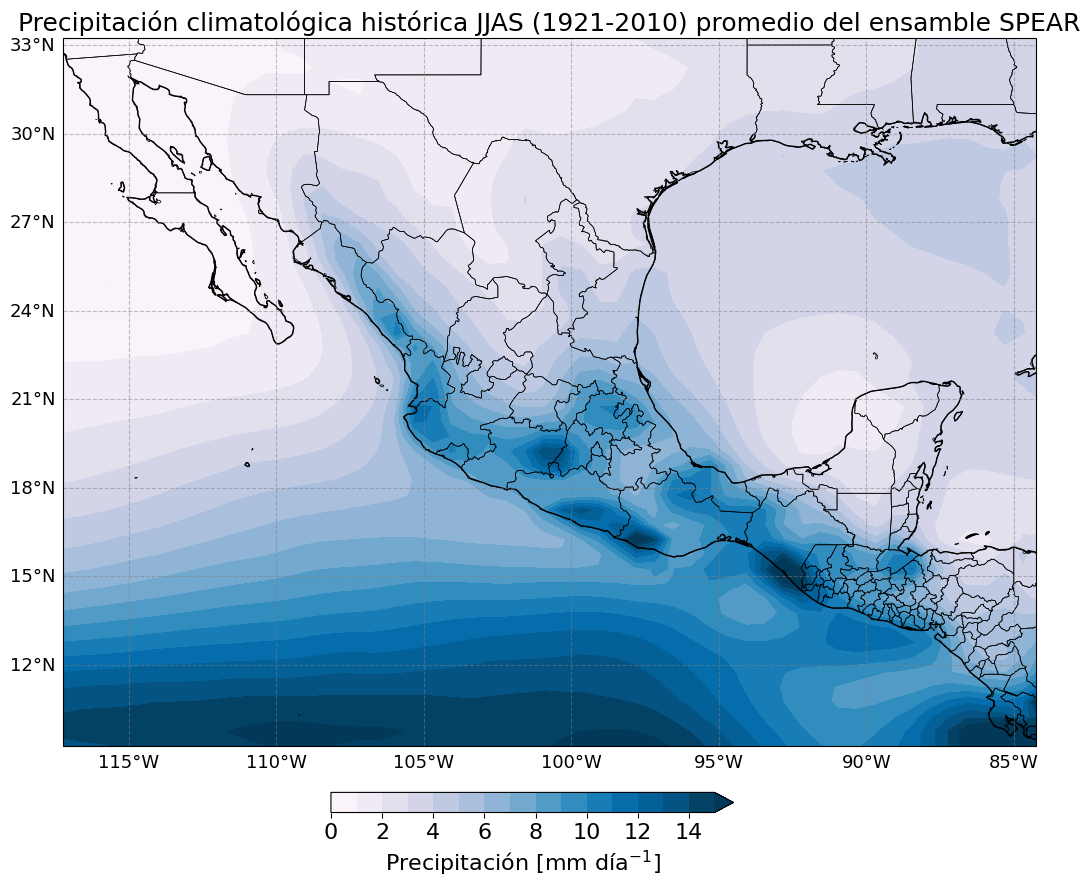

In [10]:
mapa_MC(ens_mean, np.arange(0,16,1), 'PuBu', 'Precipitación climatológica histórica JJAS (1921-2010) promedio del ensamble SPEAR', 
        lon_min=242.75, lon_max=275.75, lat_min=9.25, lat_max=33.25)

In [11]:
# Archivo de precipitación MSWEP
filename='/home/jovyan/ModClim/datos_actualizados/MSWEP_monthly_1980-2023.nc'
ds=xr.open_dataset(filename)
pr=ds['precipitation']
pr

<xarray.DataArray 'precipitation' (time: 528, lat: 180, lon: 576)> Size: 219MB
[54743040 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 4kB 1980-01-16T09:00:00 ... 2023-12-16T09:...
  * lat      (lat) float64 1kB -44.75 -44.25 -43.75 -43.25 ... 43.75 44.25 44.75
  * lon      (lon) float64 5kB 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7

In [12]:
pr=pr*8
pr['units']='mm day-1'

In [13]:
pr_years = pr.sel(time=slice('1980', '2023'))

In [14]:
jjas_mswep = pr_years.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)

In [15]:
mean_mswep_jjas = jjas_mswep.mean('time')
lats=mean_mswep_jjas.lat
lons=mean_mswep_jjas.lon

In [16]:
ens_mean

<xarray.DataArray 'precip' (lat: 90, lon: 104)> Size: 37kB
array([[0.22177045, 0.22192548, 0.22193284, ..., 3.3594358 , 3.0300136 ,
        2.7005546 ],
       [0.20944756, 0.20980176, 0.2097463 , ..., 3.9379241 , 3.689173  ,
        3.319269  ],
       [0.20573276, 0.20672303, 0.2070619 , ..., 4.7010965 , 4.5620956 ,
        4.210492  ],
       ...,
       [1.1169007 , 1.4471409 , 1.4039589 , ..., 4.6939306 , 4.7393284 ,
        4.774402  ],
       [1.0455973 , 1.3809643 , 1.6068639 , ..., 4.4052634 , 4.473079  ,
        4.544657  ],
       [1.0482656 , 1.4392629 , 1.722298  , ..., 4.2569804 , 4.2849536 ,
        4.336145  ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 720B -0.75 -0.25 0.25 0.75 ... 42.75 43.25 43.75
  * lon      (lon) float64 832B 235.3 235.9 236.6 237.2 ... 298.4 299.1 299.7
    units    <U8 32B 'mm day-1'

In [17]:
mean_mswep_jjas

<xarray.DataArray 'precipitation' (lat: 180, lon: 576)> Size: 415kB
array([[4.1020722, 4.145399 , 4.1809335, ..., 4.045134 , 4.016053 ,
        4.0330753],
       [4.2445297, 4.269407 , 4.279308 , ..., 4.169541 , 4.1616983,
        4.1919937],
       [4.3420644, 4.3475575, 4.3187413, ..., 4.2474217, 4.264086 ,
        4.3078594],
       ...,
       [2.3154097, 2.0040457, 1.7786714, ..., 2.3418005, 2.3322005,
        2.3701074],
       [2.0796487, 1.9982511, 1.947485 , ..., 1.8483864, 2.0271819,
        2.0010486],
       [2.0366838, 2.143252 , 2.119363 , ..., 1.7180028, 1.859213 ,
        1.8970608]], dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -44.75 -44.25 -43.75 -43.25 ... 43.75 44.25 44.75
  * lon      (lon) float64 5kB 0.3125 0.9375 1.562 2.188 ... 358.4 359.1 359.7
    units    <U8 32B 'mm day-1'

In [18]:
sesgo=ens_mean-mean_mswep_jjas
print(np.nanmin(sesgo), np.nanmax(sesgo))

-18.710464 10.665059


In [19]:
def mapa_dif(data, levels, ccmap, titulo, extend='both', cbarlabel='Precipitación [mm día$^{-1}$]', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(11, 7), dpi=600)
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 12}
    gl.ylabel_style = {'size': 12}
    plt.title(titulo, fontsize=17)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.018, pad=0.06,aspect=65)
    cbar.ax.xaxis.label.set_size(14)  
    cbar.ax.tick_params(labelsize=13)
    cbar.ax.set_xlabel(cbarlabel)

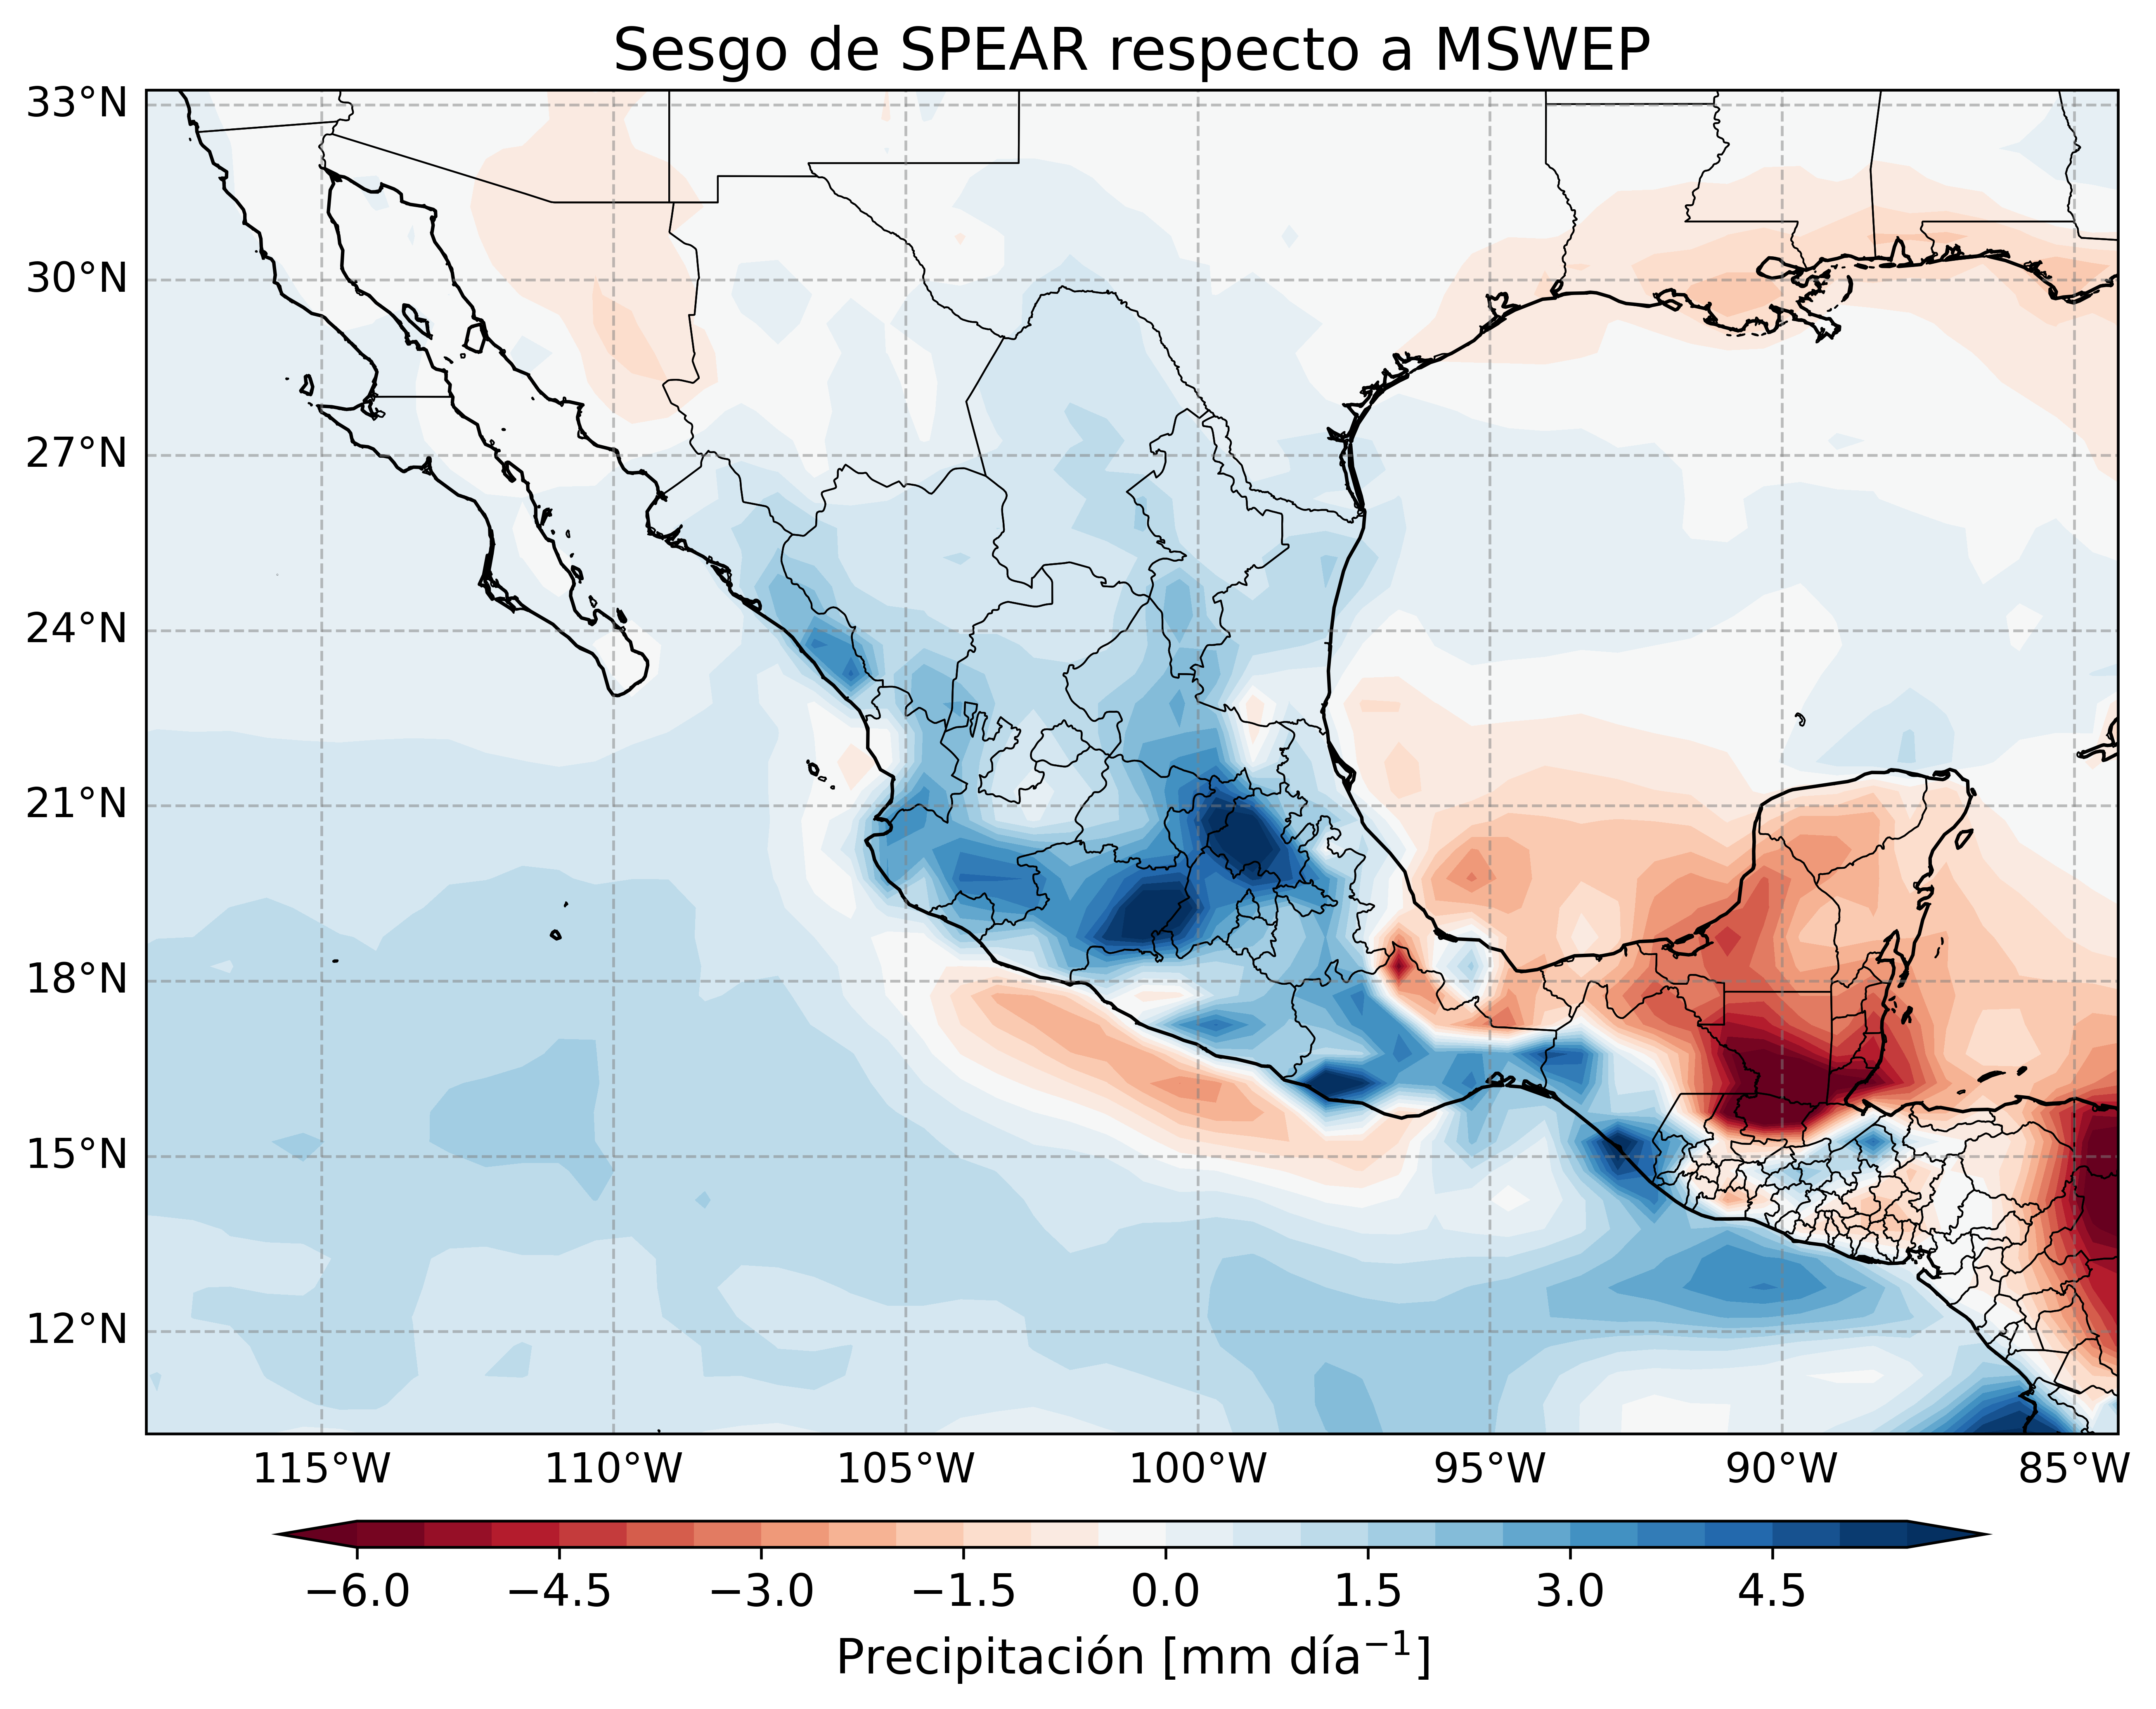

In [20]:
mapa_dif(sesgo, np.arange(-6,6,0.5), 'RdBu', 'Sesgo de SPEAR respecto a MSWEP', 
        lon_min=242, lon_max=275.75, lat_min=10.25, lat_max=33.25)